<a href="https://colab.research.google.com/github/p25-c4/kurly_project/blob/main/0320_SG_%EC%83%81%ED%92%88%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 상품 분석
    - 신선식품/가공식품의 매출액 비교
    - 연도별 상품 수의 비교

In [1]:
# !apt-get update -qq
# !apt-get install fonts-nanum* -qq
# !rm ~/.cache/matplotlib -rf

Selecting previously unselected package fonts-nanum.
(Reading database ... 121752 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fonts-nanum-coding (2.5-3) ...
Setting up fonts-nanum-eco (1.000-7) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns

import zipfile
import io

from tqdm import tqdm
from tqdm import trange, notebook
from tqdm.notebook import tqdm

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import warnings

# 오류 경고 무시하기
warnings.filterwarnings(action='ignore')
# 한글폰트 설정
mpl.rc("font",family = "NanumGothic")
mpl.rc("axes", unicode_minus = False)

In [3]:
import os
os.chdir("/content/drive/MyDrive/BigData/early_project")

In [5]:
df = pd.read_csv("kurly.csv")
df.head()

,idUser,idOrder,OrderDT,ItemCode,Price,DeliveryDT,Delay_YN,ItemLargeCode,ItemLargeName,ItemMiddleCode,...,Date,Year,Month,Day,Hour,CleanedItemName,TimeBetweenOrders,Combined,Weekday,WeekdayName
0,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L1-M12-S0070-1113,17030,2021-12-04 03:26:00,0,L1,가공식품,M12,...,2021-12-03,2021,12,3,20,이츠웰 후르츠칵테일 과일통조림 3k 슬라이스,3 days 09:06:40,"2030s, 여성",4,Friday
1,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L1-M15-S0140-1247,7680,2021-12-04 03:26:00,0,L1,가공식품,M15,...,2021-12-03,2021,12,3,20,베지가든 수제교자만두 매콤한 김치맛 720g 360gx2개입,3 days 09:06:40,"2030s, 여성",4,Friday
2,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L1-M23-S0580-1047,12420,2021-12-04 03:26:00,0,L1,가공식품,M23,...,2021-12-03,2021,12,3,20,매일유업 매일 상하치즈 피자용 모짜렐라 슈레드치즈 200gx5봉,3 days 09:06:40,"2030s, 여성",4,Friday
3,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L4-M12-S0640-1010,6250,2021-12-04 03:26:00,0,L4,신선식품,M12,...,2021-12-03,2021,12,3,20,계양구 배달 싱싱한 방울토마토 750g 작전 과일나라,3 days 09:06:40,"2030s, 여성",4,Friday
4,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L4-M17-S0130-1018,14450,2021-12-04 03:26:00,0,L4,신선식품,M17,...,2021-12-03,2021,12,3,20,낙지호롱 900g 20 25개 낙지꼬치구이 냉동낙지 양념소스70gx1팩 제공,3 days 09:06:40,"2030s, 여성",4,Friday


## 1. 신선 & 가공 비교

In [36]:
largename_df = df.groupby(['ItemLargeName', 'Year', 'Month'])['Price'].sum().reset_index()
make_df = largename_df[largename_df['ItemLargeName']=='가공식품']
fresh_df = largename_df[largename_df['ItemLargeName']=='신선식품']

In [37]:
make_df = make_df.reset_index(drop=True)  # 2021년 1월부터 2023년 12월까지 가공식품의 매출액
fresh_df = fresh_df.reset_index(drop=True) # 2021년 1월부터 2023년 12월까지 신선식품의 매출액

In [38]:
fresh_df['month'] = np.linspace(1,36,36) # 36개의 월 추가
make_df['month'] = np.linspace(1,36,36) # 36개의 월 추가

In [39]:
make_df.head()

,ItemLargeName,Year,Month,Price,month
0,가공식품,2021,1,128903590,1.0
1,가공식품,2021,2,119865490,2.0
2,가공식품,2021,3,139192960,3.0
3,가공식품,2021,4,143641740,4.0
4,가공식품,2021,5,146121280,5.0


### 매출액으로 비교

<Axes: xlabel='month', ylabel='Price'>

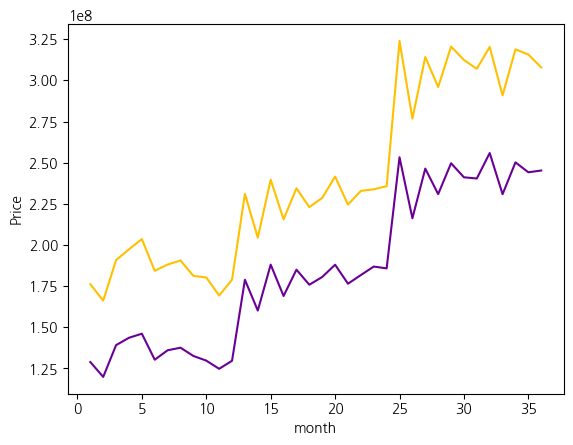

In [41]:
sns.lineplot(data = make_df, x='month', y='Price', color='#6A0096') # 가공식품 매출액 추이
sns.lineplot(data = fresh_df, x='month', y='Price', color = '#FFC000') # 신선식품 매출액 추이

### 가공식품 / 신선식품 매출액 비율

<Axes: xlabel='no', ylabel='ratio'>

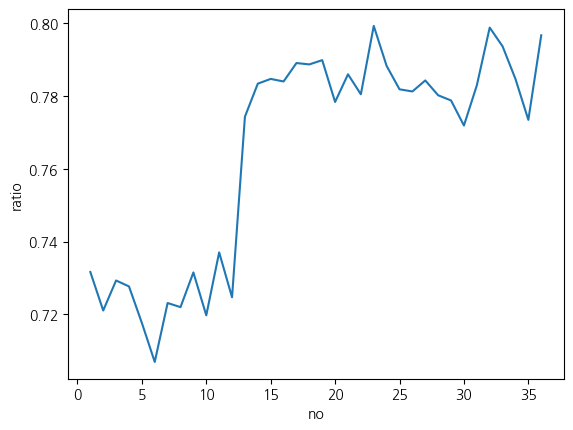

In [18]:
# 가공 / 신선 매출액 비율
sns.lineplot(data = fresh_df, x='no', y='ratio')

- 가공식품이 신선식품보다 매출액이 낮은 상황이라 성장여지가 큼
- 가공식품/신선식품 매출액 비율이 커지는 추세임.
- 가공식품의 경우 가격안정성이 높아 매출 방어에도 효과적임.
- 하지만 이제까지 포컬리는 신선식품에 더 주력함.
- 가공식품에 대한 판매 정책이 미진함.
- 매출 증가를 위해 4060 세대가 선호하는 건강기능식품(비타민) 등 새로운 가공식품 품목을 추가할 필요가 있음.

### 가공식품 & 신선식품 주문 수

In [20]:
make_fresh_count_df = df.groupby(['Year', 'ItemLargeName'])['ItemName'].count().unstack()[['가공식품','신선식품']]
make_fresh_count_df = make_fresh_count_df.stack().reset_index()

In [21]:
make_fresh_count_df.columns=['Year', 'Type', 'Counts']
make_fresh_count_df

,Year,Type,Counts
0,2021,가공식품,120213
1,2021,신선식품,139333
2,2022,가공식품,154611
3,2022,신선식품,167897
4,2023,가공식품,199807
5,2023,신선식품,216111


<Axes: xlabel='Year', ylabel='Counts'>

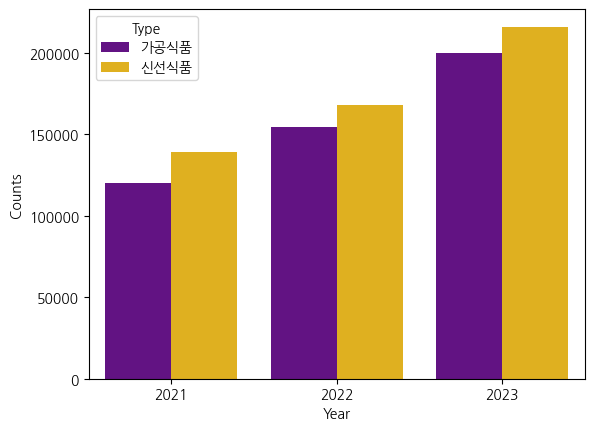

In [23]:
sns.barplot(data = make_fresh_count_df, x = 'Year', y = 'Counts', hue='Type' ,palette=['#6A0096','#FFC000'])

## 시간에 따른 상품 개수

In [6]:
df['OrderDT'] = pd.to_datetime(df['OrderDT'])

# 월별 상품 개수를 계산하기 위해, 먼저 각 행의 '년도-월' 정보를 문자열로 변환
df['YearMonthStr'] = df['OrderDT'].dt.strftime('%Y-%m')

# 월별 상품 개수 집계
monthly_product_counts = df.groupby('YearMonthStr')['ItemCode'].nunique().reset_index(name='ProductCount')

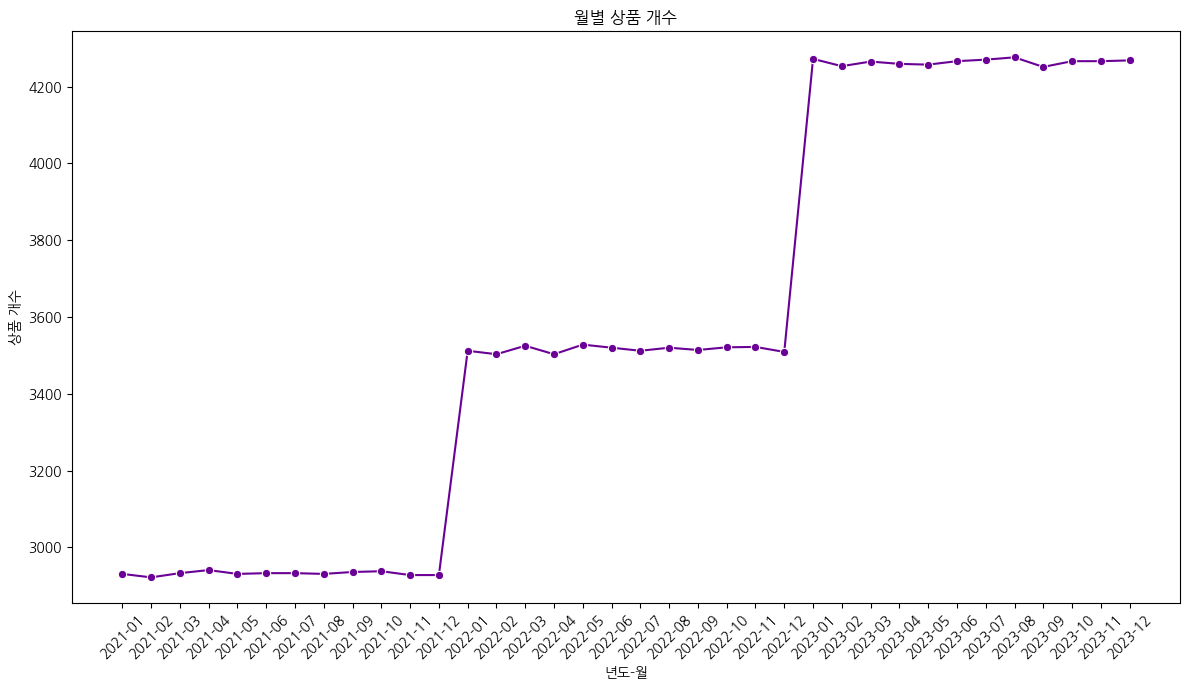

In [8]:
# 월별 상품 개수 집계
monthly_product_counts = df.groupby('YearMonthStr')['ItemCode'].nunique().reset_index(name='ProductCount')

# seaborn의 lineplot 사용하여 월별 상품 개수 시각화
plt.figure(figsize=(12, 7))
sns.lineplot(data=monthly_product_counts, x='YearMonthStr', y='ProductCount', marker='o',color="#6A0096")
plt.title('월별 상품 개수')
plt.xlabel('년도-월')
plt.ylabel('상품 개수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- 해가 바뀔 때, 상품구색이 증가함.
- 1년 주기로 상품 공급 계약을 체결함.
- 상품구색이 변화가 심한 소비자 수요를 충족하지 못함.
- 공급 계약 주기를 유동적으로 설정하여 상품 구색에 유연성을 갖춤으로써 소비자들의 변화하는 니즈에 대응할 수 있다.
- 예를 들어 포컬리가 취급하는 외의 상품에 대한 소비자의 수요를 발견한다면 가능한 빠른 시일 내에 추가 상품을 마련할 수 있고
- 매출기여도가 낮은 상품의 경우 상품 구색에서 제외할 수 있다.

## 연간 매출액

Text(0, 0.5, 'Sales')

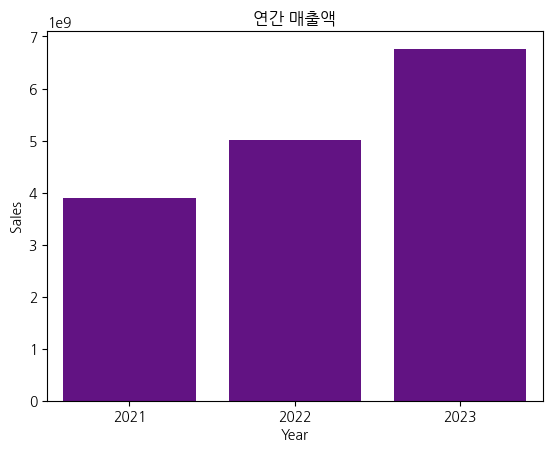

In [ ]:
sales_plot = sns.barplot(data = year_sales, x = 'Year', y='Price', color = '#6A0096')
sales_plot.set(title='연간 매출액')
plt.ylabel("Sales")